<a href="https://colab.research.google.com/github/miloszpiechota/AI-Systems/blob/main/CellBinaryClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense


import os
import cv2
from PIL import Image
import numpy as np

In [ ]:
import kagglehub
image_directory = kagglehub.dataset_download("iarunava/cell-images-for-detecting-malaria")
SIZE = 150
print("Path to dataset files:", path)
dataset = []  #Many ways to handle data, you can use pandas. Here, we are using a list format.
label = []  #Place holders to define add labels. We will add 0 to all parasitized images and 1 to uninfected.



Path to dataset files: /kaggle/input/cell-images-for-detecting-malaria


In [ ]:
# Poprawne ścieżki do katalogów
parasitized_path = os.path.join(image_directory, "cell_images", "Parasitized")
uninfected_path = os.path.join(image_directory, "cell_images", "Uninfected")

# Parametry
SIZE = 150
dataset = []
label = []

# 1. Przetwarzanie obrazów zarażonych
parasitized_images = os.listdir(parasitized_path)
for i, image_name in enumerate(parasitized_images):
    if image_name.endswith(".png"):
        image_path = os.path.join(parasitized_path, image_name)
        image = cv2.imread(image_path)
        if image is not None:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = Image.fromarray(image)
            image = image.resize((SIZE, SIZE))
            dataset.append(np.array(image))
            label.append(1)

# 2. Przetwarzanie obrazów niezarażonych
uninfected_images = os.listdir(uninfected_path)
for i, image_name in enumerate(uninfected_images):
    if image_name.endswith(".png"):
        image_path = os.path.join(uninfected_path, image_name)
        image = cv2.imread(image_path)
        if image is not None:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #OpenCV domyślnie wczytuje obraz w formacie BGR, a nie RGB.
            image = Image.fromarray(image)
            image = image.resize((SIZE, SIZE))
            dataset.append(np.array(image))
            label.append(0)

# Konwersja do tablic NumPy
dataset = np.array(dataset)
label = np.array(label)

# Informacja o wymiarach
print(f"Rozmiar dataset: {dataset.shape}")
print(f"Rozmiar label: {label.shape}")


Rozmiar dataset: (27558, 150, 150, 3)
Rozmiar label: (27558,)


Label for this image is:  0


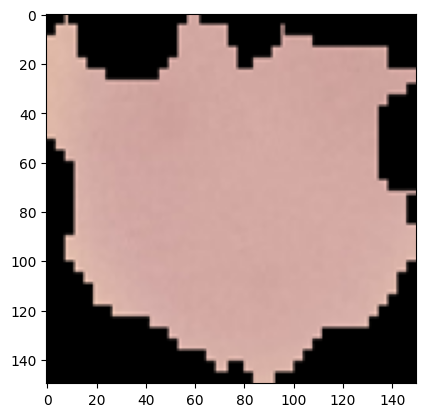

In [ ]:
#Sanity check, view few mages
import random
import numpy as np
image_number = random.randint(0, len(dataset)-1)
plt.imshow(np.reshape(dataset[image_number], (150, 150, 3)))
print("Label for this image is: ", label[image_number])


In [ ]:
from sklearn.model_selection import train_test_split
#from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.20, random_state = 0)


X_train = X_train / 255.
X_test = X_test / 255.

In [ ]:
INPUT_SHAPE = (SIZE, SIZE, 3)   #change to (SIZE, SIZE, 3)

#CNN neural network for image recognition
model = Sequential()

#First layer
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',             #also try adam
              metrics=['accuracy'])

print(model.summary())


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 148, 148, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 72, 72, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,183,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,212,513 (4.63 MB)

 Trainable params: 1,212,513 (4.63 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
history = model.fit(X_train,
                         y_train,
                         batch_size = 64,
                         verbose = 1,
                         epochs = 2,
                         validation_data=(X_test,y_test),
                         shuffle = False
                     )

Epoch 1/20
  3/345 ━━━━━━━━━━━━━━━━━━━━ 20:11 4s/step - accuracy: 0.5573 - loss: 0.6920

KeyboardInterrupt: 

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
The prediction for this image is:  [[0.5054883]]
The actual label for this image is:  1


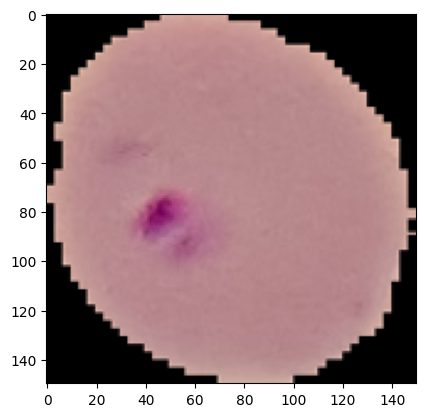

In [ ]:
n = random.randint(0, len(X_test)-1)
img = X_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
print("The prediction for this image is: ", model.predict(input_img))
print("The actual label for this image is: ", y_test[n])

In [ ]:
_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

 20/173 ━━━━━━━━━━━━━━━━━━━━ 33s 216ms/step - accuracy: 0.5148 - loss: 0.6929

KeyboardInterrupt: 

In [ ]:
#How do we know how it is doing for parasitized vs uninfected?
################################################################

#Confusion matrix
#We compare labels and plot them based on correct or wrong predictions.
#Since sigmoid outputs probabilities we need to apply threshold to convert to label.

mythreshold=0.1432
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = (model.predict(X_test)>= mythreshold).astype(int)
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

#Check the confusion matrix for various thresholds. Which one is good?
#Need to balance positive, negative, false positive and false negative.


173/173 ━━━━━━━━━━━━━━━━━━━━ 41s 235ms/step


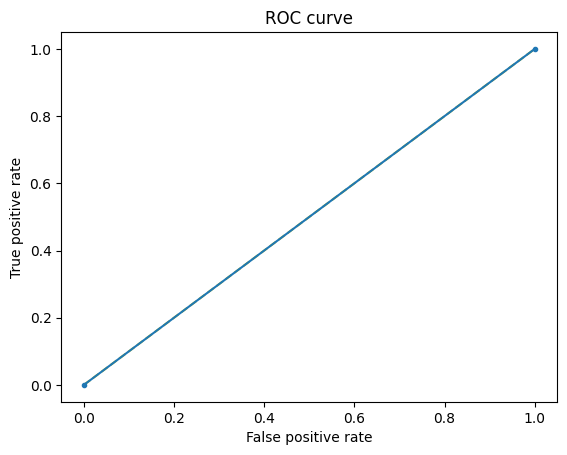

In [ ]:
#ROC can help identify the right threshold.

"""
Receiver Operating Characteristic (ROC) Curve is a plot that helps us
visualize the performance of a binary classifier when the threshold is varied.
"""
#ROC
from sklearn.metrics import roc_curve
y_preds = model.predict(X_test).ravel()

fpr, tpr, thresholds = roc_curve(y_test, y_preds)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [ ]:
"""
#One way to find the best threshold once we calculate the true positive
and false positive rates is ...
The optimal cut off point would be where “true positive rate” is high
and the “false positive rate” is low.
Based on this logic let us find the threshold where tpr-(1-fpr) is zero (or close to 0)
"""
import pandas as pd
i = np.arange(len(tpr))
roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'thresholds' : pd.Series(thresholds, index=i)})
ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]  #Locate the point where the value is close to 0
print("Ideal threshold is: ", ideal_roc_thresh['thresholds'])

Ideal threshold is:  0    inf
Name: thresholds, dtype: float32


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [ ]:
from keras.applications import MobileNetV2
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout

base_model = MobileNetV2(input_shape=(150,150,3), include_top=False, weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Zamroź bazowe warstwy
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
wrong_predictions = np.where(y_pred.flatten() != y_test)[0]
for i in wrong_predictions[:5]:
    plt.imshow(X_test[i])
    plt.title(f"Prawdziwa etykieta: {y_test[i]}, Przewidywana: {y_pred[i][0]}")
    plt.axis('off')
    plt.show()
